In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
# --- 1. Create 'reviews.csv' (Wine Data) ---
np.random.seed(42) # Taaki result same aaye

data = {
    'country': np.random.choice(['US', 'Italy', 'France', 'Spain', 'Chile', 'Argentina'], 100),
    'description': ['This is a great wine.'] * 100,
    'designation': np.random.choice(['Reserve', 'Riserva', 'Estate', 'Classic', None], 100),
    'points': np.random.randint(80, 100, 100),
    'price': np.random.uniform(10, 150, 100).round(2),
    'province': np.random.choice(['California', 'Tuscany', 'Bordeaux', 'Mendoza', 'Napa Valley'], 100),
    'region_1': np.random.choice(['Napa', 'Chianti', 'Medoc', 'Lujan de Cuyo'], 100),
    'region_2': np.random.choice(['Central Coast', 'Sonoma', 'Columbia Valley', np.nan], 100), # Some NaNs for Task 13
    'taster_name': np.random.choice(['Roger Voss', 'Kerin O’Keefe', 'Virginie Boon', np.nan], 100), # Some NaNs for Task 12
    'taster_twitter_handle': ['@vossroger'] * 100,
    'title': [f'Wine Title {i}' for i in range(100)],
    'variety': np.random.choice(['Pinot Noir', 'Cabernet Sauvignon', 'Chardonnay', 'Merlot', 'Riesling'], 100),
    'winery': [f'Winery {i}' for i in range(100)]
}

df_reviews = pd.DataFrame(data)

# Thoda data manipulate karte hain taaki specific conditions match ho jayein
# Task: Italy & Points > 90
df_reviews.loc[0:5, 'country'] = 'Italy'
df_reviews.loc[0:5, 'points'] = [92, 95, 91, 98, 93, 94]

# Task: Price missing (NaN) create karna (Task 11 ke liye)
df_reviews.loc[10:15, 'price'] = np.nan

# Task: Designation 'Reserve' ensure karna (Task 23 ke liye)
df_reviews.loc[20:30, 'designation'] = 'Reserve'

# Task: Variety 'Chardonnay' ensure karna (Task 21 ke liye)
df_reviews.loc[30:40, 'variety'] = 'Chardonnay'

# Save reviews.csv
df_reviews.to_csv('reviews.csv', index=False)
print("File Created: reviews.csv")

# --- 2. Create 'country_gdp.csv' (GDP Data for Task 14) ---
gdp_data = {
    'Country': ['US', 'China', 'Japan', 'Germany', 'India', 'France', 'Italy', 'UK', 'Brazil', 'Canada'],
    'GDP': [25.46, 17.73, 5.09, 4.22, 3.49, 2.93, 2.10, 3.18, 1.61, 2.10]
}

df_gdp = pd.DataFrame(gdp_data)
df_gdp.to_csv('country_gdp.csv', index=False)
print("File Created: country_gdp.csv")

File Created: reviews.csv
File Created: country_gdp.csv


In [175]:
df = pd.read_csv('reviews.csv')
gdp_df = pd.read_csv('country_gdp.csv')
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,This is a great wine.,NaN,92,65.03,Napa Valley,Medoc,Columbia Valley,Virginie Boon,@vossroger,Wine Title 0,Chardonnay,Winery 0
1,Italy,This is a great wine.,Reserve,95,134.89,Bordeaux,Napa,Central Coast,Kerin O’Keefe,@vossroger,Wine Title 1,Chardonnay,Winery 1
2,Italy,This is a great wine.,Reserve,91,98.36,Mendoza,Chianti,NaN,Virginie Boon,@vossroger,Wine Title 2,Cabernet Sauvignon,Winery 2
3,Italy,This is a great wine.,Reserve,98,121.27,Tuscany,Napa,Sonoma,Roger Voss,@vossroger,Wine Title 3,Merlot,Winery 3
4,Italy,This is a great wine.,Reserve,93,80.37,Bordeaux,Napa,Columbia Valley,Roger Voss,@vossroger,Wine Title 4,Pinot Noir,Winery 4


In [176]:
# 1. Indexing: Set 'title' as index
# Isse data selection 'title' ke basis pe fast ho jayega par integer indexing change ho jayegi.
df_indexed = df.set_index('title')
df_indexed.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,variety,winery
title,,,,,,,,,,,,
Wine Title 0,Italy,This is a great wine.,NaN,92,65.03,Napa Valley,Medoc,Columbia Valley,Virginie Boon,@vossroger,Chardonnay,Winery 0
Wine Title 1,Italy,This is a great wine.,Reserve,95,134.89,Bordeaux,Napa,Central Coast,Kerin O’Keefe,@vossroger,Chardonnay,Winery 1
Wine Title 2,Italy,This is a great wine.,Reserve,91,98.36,Mendoza,Chianti,NaN,Virginie Boon,@vossroger,Cabernet Sauvignon,Winery 2
Wine Title 3,Italy,This is a great wine.,Reserve,98,121.27,Tuscany,Napa,Sonoma,Roger Voss,@vossroger,Merlot,Winery 3
Wine Title 4,Italy,This is a great wine.,Reserve,93,80.37,Bordeaux,Napa,Columbia Valley,Roger Voss,@vossroger,Pinot Noir,Winery 4


In [144]:
# 2. Conditional Selection: Country='Italy' AND Points > 90 (First 5 results)
# Logic: Multiple conditions ke liye & use karein aur brackets () lagayein.
df.loc[(df['country']=='Italy') & (df['points']>90)].head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,This is a great wine.,NaN,92,65.03,Napa Valley,Medoc,Columbia Valley,Virginie Boon,@vossroger,Wine Title 0,Chardonnay,Winery 0
1,Italy,This is a great wine.,Reserve,95,134.89,Bordeaux,Napa,Central Coast,Kerin O’Keefe,@vossroger,Wine Title 1,Chardonnay,Winery 1
2,Italy,This is a great wine.,Reserve,91,98.36,Mendoza,Chianti,NaN,Virginie Boon,@vossroger,Wine Title 2,Cabernet Sauvignon,Winery 2
3,Italy,This is a great wine.,Reserve,98,121.27,Tuscany,Napa,Sonoma,Roger Voss,@vossroger,Wine Title 3,Merlot,Winery 3
4,Italy,This is a great wine.,Reserve,93,80.37,Bordeaux,Napa,Columbia Valley,Roger Voss,@vossroger,Wine Title 4,Pinot Noir,Winery 4


In [145]:
# 3. Column Selection: 'country', 'points', 'price' for first 10 rows
# Logic: loc ya iloc use kar sakte hain.
df[['country','points','price']].head(10)

,country,points,price
0,Italy,92,65.03
1,Italy,95,134.89
2,Italy,91,98.36
3,Italy,98,121.27
4,Italy,93,80.37
5,Italy,94,90.77
6,France,81,78.95
7,France,91,37.33
8,France,85,111.14
9,Chile,83,49.31


In [146]:
# 4. GroupBy Aggregation: Average points and price by country
# Logic: groupby ke baad dictionary pass karke alag columns pe alag operation kar sakte hain.
df.groupby('country').agg({'points':'mean', 'price':'mean'})

,points,price
country,,
Argentina,85.529412,74.646875
Chile,88.142857,87.276154
France,92.500000,98.345556
Italy,91.708333,83.167826
Spain,89.083333,77.507273
US,90.000000,98.303636


In [147]:
# 5. GroupBy Multi-Index: Count reviews by country and province
df.groupby(['country','province']).size()

country    province   
Argentina  Bordeaux       3
           California     3
           Mendoza        2
           Napa Valley    4
           Tuscany        5
Chile      Bordeaux       3
           California     4
           Mendoza        4
           Napa Valley    2
           Tuscany        1
France     Bordeaux       2
           California     3
           Mendoza        2
           Napa Valley    1
           Tuscany        2
Italy      Bordeaux       4
           California     5
           Mendoza        4
           Napa Valley    7
           Tuscany        4
Spain      Bordeaux       2
           California     2
           Mendoza        8
           Napa Valley    7
           Tuscany        5
US         Bordeaux       1
           California     1
           Napa Valley    3
           Tuscany        6
dtype: int64

In [148]:
# 6. Aggregate Function: Min, Max, Average price by Variety
df.groupby('variety')['price'].agg(['min','max','mean'])

,min,max,mean
variety,,,
Cabernet Sauvignon,12.16,144.77,78.607500
Chardonnay,23.60,148.61,96.734688
Merlot,21.95,127.04,86.920000
Pinot Noir,13.55,141.06,89.237059
Riesling,14.27,123.31,55.185714


In [149]:
# 7. Pivot Table: Average points (Country vs Variety)
df.pivot_table(index='country',values='points',columns='variety', aggfunc='mean')

variety,Cabernet Sauvignon,Chardonnay,Merlot,Pinot Noir,Riesling
country,,,,,
Argentina,85.5,83.250000,87.500000,88.500000,83.333333
Chile,91.0,84.166667,NaN,93.000000,82.000000
France,NaN,95.666667,NaN,91.500000,91.000000
Italy,94.0,91.000000,93.333333,88.666667,89.333333
Spain,90.5,88.750000,87.250000,81.500000,93.250000
US,92.5,87.333333,NaN,96.000000,NaN


In [150]:
# 8. Pivot Table: Average price (Country vs Province), fill NaN with 0
df.pivot_table(index='country',values='price', columns='province', fill_value=0, aggfunc='mean')

province,Bordeaux,California,Mendoza,Napa Valley,Tuscany
country,,,,,
Argentina,70.820000,57.306667,47.365000,86.773333,90.984000
Chile,49.756667,115.537500,80.946667,67.500000,145.330000
France,96.580000,103.233333,111.140000,37.330000,116.890000
Italy,102.607500,85.172000,62.455000,74.732857,101.206667
Spain,114.105000,110.040000,66.770000,78.607143,70.625000
US,87.950000,15.230000,0.000000,108.303333,108.875000


In [151]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,This is a great wine.,NaN,92,65.03,Napa Valley,Medoc,Columbia Valley,Virginie Boon,@vossroger,Wine Title 0,Chardonnay,Winery 0
1,Italy,This is a great wine.,Reserve,95,134.89,Bordeaux,Napa,Central Coast,Kerin O’Keefe,@vossroger,Wine Title 1,Chardonnay,Winery 1
2,Italy,This is a great wine.,Reserve,91,98.36,Mendoza,Chianti,NaN,Virginie Boon,@vossroger,Wine Title 2,Cabernet Sauvignon,Winery 2
3,Italy,This is a great wine.,Reserve,98,121.27,Tuscany,Napa,Sonoma,Roger Voss,@vossroger,Wine Title 3,Merlot,Winery 3
4,Italy,This is a great wine.,Reserve,93,80.37,Bordeaux,Napa,Columbia Valley,Roger Voss,@vossroger,Wine Title 4,Pinot Noir,Winery 4


In [152]:
# 9. Top Varieties by Country: Top 5 varieties from 'US' (Note: Check dataset country name, assumes 'US')
# us_wines = df[df['country']=='US']
# top_5_varieties = us_wines['variety'].value_counts().head(5).index
# top_5_varieties

df.loc[df['country']=='US']['variety'].value_counts().head(5).index

Index(['Chardonnay', 'Cabernet Sauvignon', 'Pinot Noir'], dtype='object', name='variety')

In [153]:
# 10. Top Rated Wines: Points > 95 AND Price > 100
df[(df['points']>95) & (df['price']>100)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
3,Italy,This is a great wine.,Reserve,98,121.27,Tuscany,Napa,Sonoma,Roger Voss,@vossroger,Wine Title 3,Merlot,Winery 3
25,Chile,This is a great wine.,Reserve,99,129.16,Mendoza,Lujan de Cuyo,Central Coast,NaN,@vossroger,Wine Title 25,Pinot Noir,Winery 25
29,France,This is a great wine.,Reserve,98,141.06,Tuscany,Medoc,Sonoma,Roger Voss,@vossroger,Wine Title 29,Pinot Noir,Winery 29
30,France,This is a great wine.,Reserve,99,107.44,California,Lujan de Cuyo,Central Coast,Roger Voss,@vossroger,Wine Title 30,Chardonnay,Winery 30
37,France,This is a great wine.,Riserva,97,132.83,Bordeaux,Medoc,Sonoma,NaN,@vossroger,Wine Title 37,Chardonnay,Winery 37
77,Italy,This is a great wine.,Estate,97,111.65,Napa Valley,Chianti,NaN,Kerin O’Keefe,@vossroger,Wine Title 77,Riesling,Winery 77
88,Chile,This is a great wine.,Reserve,99,107.44,California,Chianti,NaN,NaN,@vossroger,Wine Title 88,Pinot Noir,Winery 88


In [154]:
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,This is a great wine.,NaN,92,65.03,Napa Valley,Medoc,Columbia Valley,Virginie Boon,@vossroger,Wine Title 0,Chardonnay,Winery 0
1,Italy,This is a great wine.,Reserve,95,134.89,Bordeaux,Napa,Central Coast,Kerin O’Keefe,@vossroger,Wine Title 1,Chardonnay,Winery 1
2,Italy,This is a great wine.,Reserve,91,98.36,Mendoza,Chianti,NaN,Virginie Boon,@vossroger,Wine Title 2,Cabernet Sauvignon,Winery 2
3,Italy,This is a great wine.,Reserve,98,121.27,Tuscany,Napa,Sonoma,Roger Voss,@vossroger,Wine Title 3,Merlot,Winery 3
4,Italy,This is a great wine.,Reserve,93,80.37,Bordeaux,Napa,Columbia Valley,Roger Voss,@vossroger,Wine Title 4,Pinot Noir,Winery 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Spain,This is a great wine.,NaN,91,102.43,Napa Valley,Lujan de Cuyo,NaN,Kerin O’Keefe,@vossroger,Wine Title 95,Cabernet Sauvignon,Winery 95
96,Spain,This is a great wine.,Reserve,98,49.19,Mendoza,Lujan de Cuyo,Central Coast,Kerin O’Keefe,@vossroger,Wine Title 96,Riesling,Winery 96
97,Chile,This is a great wine.,Reserve,93,143.68,California,Chianti,Central Coast,Kerin O’Keefe,@vossroger,Wine Title 97,Cabernet Sauvignon,Winery 97
98,US,This is a great wine.,Estate,85,113.31,Napa Valley,Lujan de Cuyo,NaN,Kerin O’Keefe,@vossroger,Wine Title 98,Chardonnay,Winery 98


In [155]:
# 11. Imputation: Fill missing price with Median of THAT country
# Logic: 'transform' function group ke andar calculation karke original shape maintain karta hai.
df['price'].fillna(df.groupby('country')['price'].transform('median'))

0      65.03
1     134.89
2      98.36
3     121.27
4      80.37
       ...  
95    102.43
96     49.19
97    143.68
98    113.31
99     87.61
Name: price, Length: 100, dtype: float64

In [156]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,This is a great wine.,NaN,92,65.03,Napa Valley,Medoc,Columbia Valley,Virginie Boon,@vossroger,Wine Title 0,Chardonnay,Winery 0
1,Italy,This is a great wine.,Reserve,95,134.89,Bordeaux,Napa,Central Coast,Kerin O’Keefe,@vossroger,Wine Title 1,Chardonnay,Winery 1
2,Italy,This is a great wine.,Reserve,91,98.36,Mendoza,Chianti,NaN,Virginie Boon,@vossroger,Wine Title 2,Cabernet Sauvignon,Winery 2
3,Italy,This is a great wine.,Reserve,98,121.27,Tuscany,Napa,Sonoma,Roger Voss,@vossroger,Wine Title 3,Merlot,Winery 3
4,Italy,This is a great wine.,Reserve,93,80.37,Bordeaux,Napa,Columbia Valley,Roger Voss,@vossroger,Wine Title 4,Pinot Noir,Winery 4


In [157]:
# 12. Dropping Rows: Where 'taster_name' is missing
df = df.dropna(subset=['taster_name'])
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,This is a great wine.,NaN,92,65.03,Napa Valley,Medoc,Columbia Valley,Virginie Boon,@vossroger,Wine Title 0,Chardonnay,Winery 0
1,Italy,This is a great wine.,Reserve,95,134.89,Bordeaux,Napa,Central Coast,Kerin O’Keefe,@vossroger,Wine Title 1,Chardonnay,Winery 1
2,Italy,This is a great wine.,Reserve,91,98.36,Mendoza,Chianti,NaN,Virginie Boon,@vossroger,Wine Title 2,Cabernet Sauvignon,Winery 2
3,Italy,This is a great wine.,Reserve,98,121.27,Tuscany,Napa,Sonoma,Roger Voss,@vossroger,Wine Title 3,Merlot,Winery 3
4,Italy,This is a great wine.,Reserve,93,80.37,Bordeaux,Napa,Columbia Valley,Roger Voss,@vossroger,Wine Title 4,Pinot Noir,Winery 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Spain,This is a great wine.,NaN,91,102.43,Napa Valley,Lujan de Cuyo,NaN,Kerin O’Keefe,@vossroger,Wine Title 95,Cabernet Sauvignon,Winery 95
96,Spain,This is a great wine.,Reserve,98,49.19,Mendoza,Lujan de Cuyo,Central Coast,Kerin O’Keefe,@vossroger,Wine Title 96,Riesling,Winery 96
97,Chile,This is a great wine.,Reserve,93,143.68,California,Chianti,Central Coast,Kerin O’Keefe,@vossroger,Wine Title 97,Cabernet Sauvignon,Winery 97
98,US,This is a great wine.,Estate,85,113.31,Napa Valley,Lujan de Cuyo,NaN,Kerin O’Keefe,@vossroger,Wine Title 98,Chardonnay,Winery 98


In [162]:
# 13. Forward Fill: 'region_2' column
df['region_2'].fillna(method='ffill')

/tmp/ipykernel_6230/2031857951.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['region_2'].fillna(method='ffill')


0     Columbia Valley
1       Central Coast
2       Central Coast
3              Sonoma
4     Columbia Valley
           ...       
95             Sonoma
96      Central Coast
97      Central Coast
98      Central Coast
99      Central Coast
Name: region_2, Length: 86, dtype: object

In [165]:
# 14. Merge with GDP Data
# Pehle original df se first 50 rows lete hain aur columns select karte hain
merge_df = pd.merge(df, gdp_df, left_on='country', right_on='Country', how='left')
merge_df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Country,GDP
0,Italy,This is a great wine.,NaN,92,65.03,Napa Valley,Medoc,Columbia Valley,Virginie Boon,@vossroger,Wine Title 0,Chardonnay,Winery 0,Italy,2.10
1,Italy,This is a great wine.,Reserve,95,134.89,Bordeaux,Napa,Central Coast,Kerin O’Keefe,@vossroger,Wine Title 1,Chardonnay,Winery 1,Italy,2.10
2,Italy,This is a great wine.,Reserve,91,98.36,Mendoza,Chianti,NaN,Virginie Boon,@vossroger,Wine Title 2,Cabernet Sauvignon,Winery 2,Italy,2.10
3,Italy,This is a great wine.,Reserve,98,121.27,Tuscany,Napa,Sonoma,Roger Voss,@vossroger,Wine Title 3,Merlot,Winery 3,Italy,2.10
4,Italy,This is a great wine.,Reserve,93,80.37,Bordeaux,Napa,Columbia Valley,Roger Voss,@vossroger,Wine Title 4,Pinot Noir,Winery 4,Italy,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Spain,This is a great wine.,NaN,91,102.43,Napa Valley,Lujan de Cuyo,NaN,Kerin O’Keefe,@vossroger,Wine Title 95,Cabernet Sauvignon,Winery 95,NaN,NaN
82,Spain,This is a great wine.,Reserve,98,49.19,Mendoza,Lujan de Cuyo,Central Coast,Kerin O’Keefe,@vossroger,Wine Title 96,Riesling,Winery 96,NaN,NaN
83,Chile,This is a great wine.,Reserve,93,143.68,California,Chianti,Central Coast,Kerin O’Keefe,@vossroger,Wine Title 97,Cabernet Sauvignon,Winery 97,NaN,NaN
84,US,This is a great wine.,Estate,85,113.31,Napa Valley,Lujan de Cuyo,NaN,Kerin O’Keefe,@vossroger,Wine Title 98,Chardonnay,Winery 98,US,25.46


In [177]:
# 15. Lambda: Price Category
def catgorize_price(p):
    if p<20: return 'low'
    elif 20<= p < 50: return 'medium'
    elif 50<= p <100: return 'high'
    else: return 'Premium'

df['categorize_price'] = df['price'].apply(categorize_price)
df['categorize_price'].value_counts()

categorize_price
Premium    42
high       37
medium     15
low         6
Name: count, dtype: int64

In [179]:
# 16. Lambda: Title Length
df['title_length'] = df['title'].apply(lambda x:len(str(x)))
df['title_length']

0     12
1     12
2     12
3     12
4     12
      ..
95    13
96    13
97    13
98    13
99    13
Name: title_length, Length: 100, dtype: int64

Text(0.5, 1.0, 'Distribution of Points (KDE)')

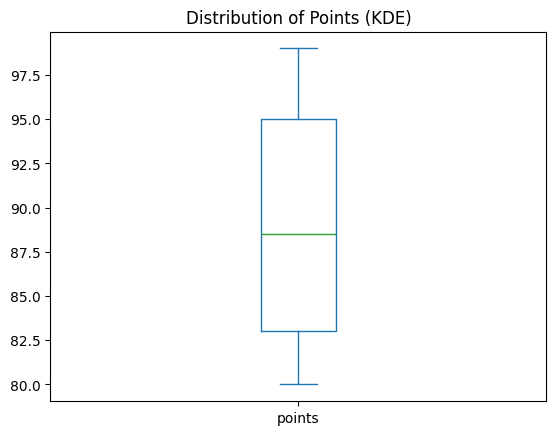

In [183]:
# 17. KDE Plot for Points
df['points'].plot(kind='box')
plt.title("Distribution of Points (KDE)")

Text(0.5, 1.0, 'Price Distribution (< $200)')

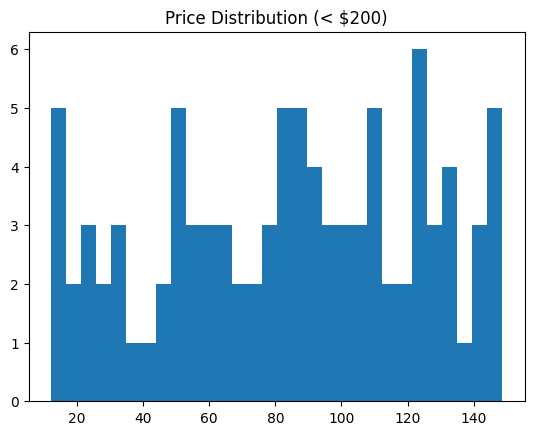

In [188]:
# 18. Distribution Plot for Price
plt.hist(df[df['price'] < 200]['price'], bins=30)
plt.title("Price Distribution (< $200)")

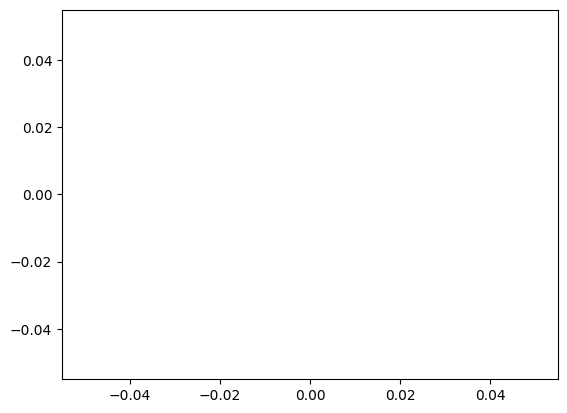

In [197]:
# 19. Boxplot: Points by Country (Top 5 countries for clarity)
top_5_countries = df['country'].value_counts().head(5)


In [199]:
# 20. Pivot & Melt
# Step A: Pivot (Country rows, Taster columns, Avg Points values)
df.pivot_table(index = 'country', values='points', columns='taster_name', aggfunc='mean')

taster_name,Kerin O’Keefe,Roger Voss,Virginie Boon
country,,,
Argentina,84.600000,87.250000,83.333333
Chile,87.750000,86.600000,NaN
France,NaN,93.571429,82.000000
Italy,90.285714,93.142857,91.700000
Spain,90.285714,83.250000,94.750000
US,92.666667,96.000000,86.000000


In [200]:
# 21. Top 3 Wineries for 'Chardonnay'
chardonnay_wines = df[df['variety']=='Chardonnay']
chardonnay_wines.groupby('winery')['points'].mean().sort_values(ascending=False).head(3)

winery
Winery 30    99.0
Winery 14    99.0
Winery 32    99.0
Name: points, dtype: float64

In [203]:
# 22. Outlier Detection (Price > 95th percentile)
price_threshold = df['price'].quantile(0.95)
df[df['price']>price_threshold]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,categorize_price,title_length
20,Chile,This is a great wine.,Reserve,80,145.33,Tuscany,Napa,NaN,Roger Voss,@vossroger,Wine Title 20,Chardonnay,Winery 20,Premium,13
21,US,This is a great wine.,Reserve,88,144.91,Tuscany,Medoc,Central Coast,Virginie Boon,@vossroger,Wine Title 21,Chardonnay,Winery 21,Premium,13
34,Argentina,This is a great wine.,Estate,80,148.61,Tuscany,Lujan de Cuyo,Central Coast,Kerin O’Keefe,@vossroger,Wine Title 34,Chardonnay,Winery 34,Premium,13
78,Spain,This is a great wine.,Reserve,81,146.62,Bordeaux,Chianti,NaN,Roger Voss,@vossroger,Wine Title 78,Chardonnay,Winery 78,Premium,13
86,US,This is a great wine.,Classic,93,144.77,Tuscany,Napa,Sonoma,Roger Voss,@vossroger,Wine Title 86,Cabernet Sauvignon,Winery 86,Premium,13


In [205]:
# 23. Subset on Designation ('Reserve')
# Logic: str.contains use karenge case insensitive mode mein


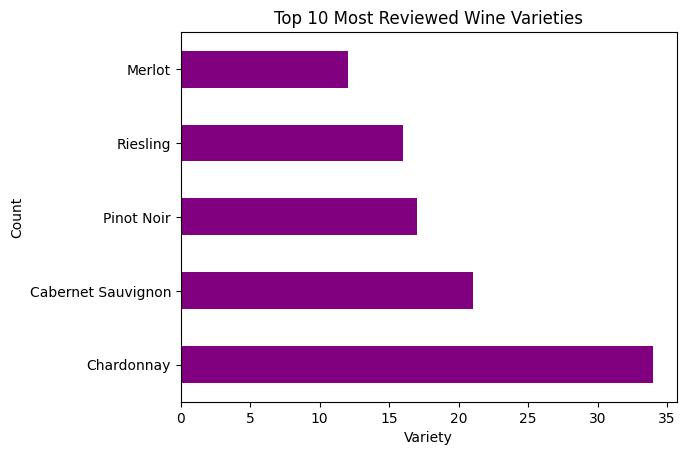

In [209]:
# 24. Most Reviewed Varieties (Bar Graph)
top_10_varieties = df['variety'].value_counts().head(10)
top_10_varieties.plot(kind='barh', color = 'purple')
plt.title("Top 10 Most Reviewed Wine Varieties")
plt.xlabel("Variety")
plt.ylabel("Count")
plt.show()

<Axes: ylabel='region_1'>

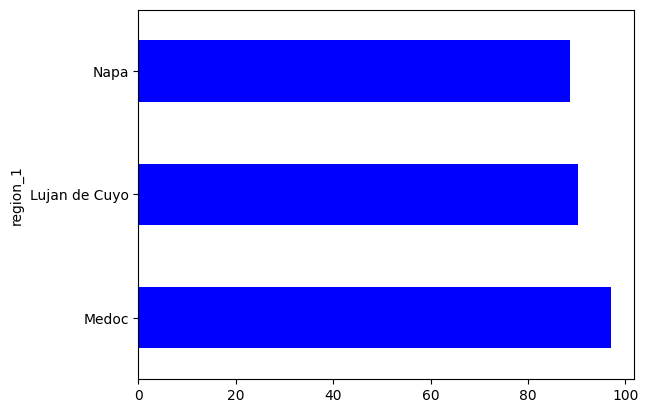

In [211]:
# 25. Wine Quality by Region (e.g., France)
region_france = df[df['country']=='France']
region_stats = region_france.groupby('region_1')['points'].mean().sort_values(ascending=False).head(10)
region_stats.plot(kind = 'barh', color='blue')